In [40]:
# Session 20 - Linear Regressions--4 by Sreedhara Jagatagar  Sreenivasa
#Build the linear regression model using scikit learn in boston data to predict 'Price' based on other 
#dependent variable. 

#Here is the code to load the data 
import numpy as np 
import pandas as pd 
import scipy.stats as stats 
import matplotlib.pyplot as plt 
import sklearn 
from sklearn.datasets import load_boston 
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import math as math
from sklearn.metrics import mean_squared_error

#Load Boston Data from SKLEARN
boston = load_boston()
keys=boston.keys()

In [2]:
#Keys of the dectionaris
print(keys)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [3]:
#Data set shape. ie number of rows and columns
boston.data.shape

(506, 13)

In [4]:
#Data Set Columns
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [49]:
#Understand the Boston House Prices dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
#convert boston.data into a pandas data frame
bos = pd.DataFrame(boston.data) 
bos.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
#Assign Columns names using feature names
bos.columns=boston.feature_names
bos.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
#boston.target contains the housing prices
print(boston.target[:5])

#Add the Husing price to Data Frame
bos['PRICE']=boston.target
bos.head()

[24.  21.6 34.7 33.4 36.2]


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
#Drop the PRICE columns and have X
X=bos.drop('PRICE',axis=1)
Y=bos.PRICE

#Create LinearRegression Object
lm=LinearRegression()

In [50]:
#lm.fit() #  fits a linear model
#lm.predict() -> Predict Y using the linear model with estimated coefficients
#lm.score() -> Returns the coefficient of determination (R^2). A measure of how well observed outcomes are 
#replicated by the model, as the proportion of total variation of outcomes explained by the model. 

lm.fit(X, Y)
print('Estimated intercept Co-efficient :', lm.intercept_)
print(' ')
print('Co-efficient :', lm.coef_)

Estimated intercept Co-efficient : 36.45948838509015
 
Co-efficient : [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]


In [51]:
#print(X.columns)
#print(lm.coef_)
#dict(zip(X.columns,lm.coef_))

d=pd.DataFrame(dict(zip(X.columns,lm.coef_)), ['features','estimatedCoefficients'])
d.T

,features,estimatedCoefficients
CRIM,-0.108011,-0.108011
ZN,0.046420,0.046420
INDUS,0.020559,0.020559
CHAS,2.686734,2.686734
NOX,-17.766611,-17.766611
RM,3.809865,3.809865
AGE,0.000692,0.000692
DIS,-1.475567,-1.475567
RAD,0.306049,0.306049
TAX,-0.012335,-0.012335


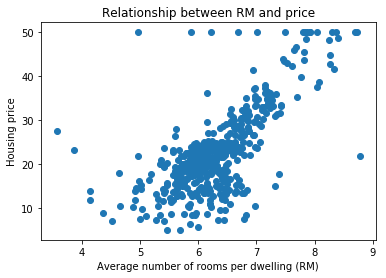

In [52]:
plt.scatter(bos.RM,bos.PRICE)
plt.xlabel('Average number of rooms per dwelling (RM)')
plt.ylabel('Housing price')
plt.title('Relationship between RM and price')
plt.show()

In [23]:
#Predict housing prices using lm.prredict.
lm.predict(X)[:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

In [14]:
#Print Current Price and Predicted Prices
df_tmp=pd.DataFrame({'Current_Price':bos.PRICE,'Predicted_Price':lm.predict(X)})
df_tmp.head(10)

,Current_Price,Predicted_Price
0,24.0,30.003843
1,21.6,25.025562
2,34.7,30.567597
3,33.4,28.607036
4,36.2,27.943524
5,28.7,25.256284
6,22.9,23.001808
7,27.1,19.535988
8,16.5,11.523637
9,18.9,18.920262


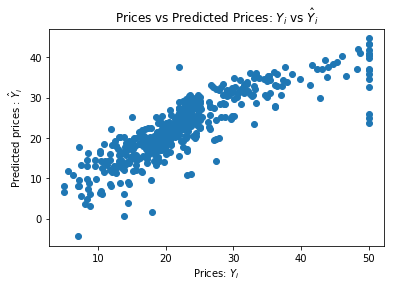

In [15]:
#Compare the True Prices V/S Predicted Prices
plt.scatter(bos.PRICE, lm.predict(X))
plt.xlabel('Prices: $Y_i$')
plt.ylabel('Predicted prices : $\hat{Y}_i$')
plt.title('Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$')
plt.show()

In [53]:
#Let us calculate mean squared Error
mseFull=np.mean((bos.PRICE-lm.predict(X))**2)
print(mseFull)

21.89483118172922


In [54]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [55]:
Y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

In [26]:
X.shape

(506, 13)

In [27]:
Y.shape

(506,)

In [31]:
#Create Model using OLS and check information
model = sm.OLS(Y,X).fit()

In [32]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     891.3
Date:                Sun, 14 Oct 2018   Prob (F-statistic):               0.00
Time:                        15:01:41   Log-Likelihood:                -1523.8
No. Observations:                 506   AIC:                             3074.
Df Residuals:                     493   BIC:                             3128.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0929      0.034     -2.699      0.007      -0.161      -0.025
ZN             0.0487      0.014      3.382      0.001       0.020       0.077
INDUS         -0.0041      0.064     -0.063      0.950      -0.131       0.123
CHAS           2.8540      0.904      3.157      0.002       1.078       4.630
NOX           -2.8684      3.359     -0.854      0.394      -9.468       3.731
RM             5.9281      0.309     19.178      0.000       5.321       6.535
AGE           -0.0073      0.014     -0.526      0.599      -0.034       0.020
DIS           -0.9685      0.196     -4.951      0.000      -1.353      -0.584
RAD            0.1712      0.067      2.564      0.011       0.040       0.302
TAX           -0.0094      0.004     -2.395      0.017      -0.017      -0.002
PTRATIO       -0.3922      0.110     -3.570      0.000      -0.608      -0.176
B              0.0149      0.003      5.528      0.000       0.010       0.020
LSTAT         -0.4163      0.051     -8.197      0.000      -0.516      -0.317
==============================================================================
Omnibus:                      204.082   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1374.225
Skew:                           1.609   Prob(JB):                    3.90e-299
Kurtosis:                      10.404   Cond. No.                     8.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
#Lets take the feature ‘PTRATIO’ and calculate the mean squared error.
lm=LinearRegression()
lm.fit(X[['PTRATIO']],bos.PRICE)
msePTRATIO=np.mean((bos.PRICE-lm.predict(X[['PTRATIO']]))** 2)
print(msePTRATIO)

62.65220001376927


In [59]:
#Split the data for both Train and Test
#we can divide  data sets randomly. Scikit learn provides a function called train_test_split to do this.
#X_train,X_test, Y_train,Y_test=sklearn.model_selection.train_test_split(X,bos.PRICE,test_size=-0.33,random_state=5)
X_test,X_train,Y_test, Y_train=sklearn.model_selection.train_test_split(X,Y,test_size=-0.33,random_state=5)
print(X_train.shape,X_test.shape, Y_train.shape,Y_test.shape)

(340, 13) (166, 13) (340,) (166,)


In [72]:
#build a linear regression model using my  train-test data sets.
lm=LinearRegression()
lm.fit(X_train,Y_train)
pred_train=lm.predict(X_train)
pred_test=lm.predict(X_test)

#calculate the mean squared error for training and test data and evaluate
#Input
print("Fit a model X_train, and calculate MSE with Y_train:", np.mean((Y_train-lm.predict(X_train)) ** 2))
print("Fit a model X_train, and calculate MSE with X_test, Y_test:", np.mean((Y_test-lm.predict(X_test)) ** 2))
print('RMSE Train', math.sqrt(mean_squared_error(pred_train, Y_train)))
print('RMSE Test' ,math.sqrt(mean_squared_error(pred_test, Y_test)))

Fit a model X_train, and calculate MSE with Y_train: 20.56130863911928
Fit a model X_train, and calculate MSE with X_test, Y_test: 25.64565479223343
RMSE Train 4.53445792119844
RMSE Test 5.06415390684697


In [63]:
#### Create a Dataframe for current price and pridected price for training data set
df_tmp=pd.DataFrame({'Current_Price':bos.PRICE[:340],'Predicted_Price':lm.predict(X_train)})
df_tmp.head(10)

,Current_Price,Predicted_Price
0,24.0,37.715053
1,21.6,31.602732
2,34.7,26.632164
3,33.4,4.578095
4,36.2,36.567563
5,28.7,6.444663
6,22.9,28.190113
7,27.1,32.508166
8,16.5,26.522676
9,18.9,22.305945


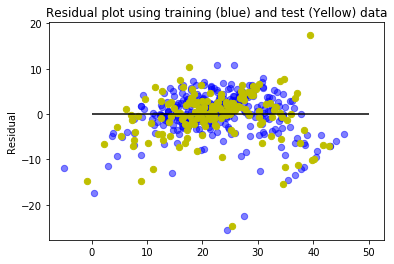

In [62]:
#Residual plots are a good way to visualize the errors in data.  If model is good then pricing data 
#should be randomly scattered around line zero. below plot shows that it is good model.

#Plot using both Train and Test Data with caluclated Residual
plt.scatter(lm.predict(X_train),lm.predict(X_train)-Y_train,c='b',s=40,alpha=0.5)
plt.scatter(lm.predict(X_test),lm.predict(X_test)-Y_test,c='y',s=40)
plt.hlines(y=0,xmin=0,xmax=50)
plt.title('Residual plot using training (blue) and test (Yellow) data')
plt.ylabel('Residual')
plt.show()

In [111]:
#Now model is ready to predict the price based on below featured variables.

#Predict the housing price for passed below 
#Attribute Information (in order):
#        - CRIM     per capita crime rate by town
#        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
#        - INDUS    proportion of non-retail business acres per town
#        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#        - NOX      nitric oxides concentration (parts per 10 million)
#        - RM       average number of rooms per dwelling
#        - AGE      proportion of owner-occupied units built prior to 1940
#        - DIS      weighted distances to five Boston employment centres
#        - RAD      index of accessibility to radial highways
#        - TAX      full-value property-tax rate per $10,000
#        - PTRATIO  pupil-teacher ratio by town
#        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#        - LSTAT    % lower status of the population

#Call the model by passing above paraneters
pred_price=lm.predict(np.array([[0.11742,58.0,20.51,0.0,0.3,6.575,65.2,4.4900,1.0,296.0,15.3,796.90,6.98]]))

#print Predicted price
print('Predicted price for the passed values :',pred_price)

Predicted price for the passed values : [39.11822926]
